Introduction
In this notebook, we have mainly focused on analyzing previous_application.csv i.e. data about previous application of an applicant.

Approach
For the Exploratory data analysis, mentioned steps have been followed.

--> Import Modules

--> Read the dataset

--> Data Cleaning

Missing value handling
Type Casting
Fixing Rows and Columns - removing unncessary rows/columns (through missing value handling and correlation)
Handling Outliers
--> Univariate Analysis

--> Bivariate and Multivariate Analysis

In [1]:
print("Hello")

Hello


In [2]:
# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn Style
plt.style.use('seaborn-pastel')
%matplotlib inline

##### 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [4]:
#Reading data to notebook
adf = pd.read_csv("application_data.csv")
pdf = pd.read_csv("previous_application.csv")

In [5]:
adf.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pdf.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [7]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
print(adf.shape)
print(f'Now we have {adf.shape[1]-1} features columns, 1 target column, and {adf.shape[0]} rows')

(307511, 122)
Now we have 121 features columns, 1 target column, and 307511 rows


In [9]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
print(pdf.shape)
print(f'Now we have {pdf.shape[1]} features columns and {pdf.shape[0]} rows')

(1670214, 37)
Now we have 37 features columns and 1670214 rows


In [11]:
# Additional columns and common columns in application_data and previous_application
additional_columns = []
common_columns = []

for feat in adf.columns:
    if feat not in pdf.columns:
        additional_columns.append(feat)
    else:
        common_columns.append(feat)
        
print(f"There are {len(additional_columns)} additional columns.\n")
print(f"There are {len(common_columns)} Common columns.\n")
print(f"We can use {common_columns[0]} from {common_columns} common columns to merge data.\n")

There are 114 additional columns.

There are 8 Common columns.

We can use SK_ID_CURR from ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'] common columns to merge data.



In [12]:
#Find percentage of missing values for each column.
pdf.isnull().sum() * 100 / len(pdf)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [13]:
#Find out Columns with missing value more than 50%
missing_value_per = pdf.isnull().sum() * 100 / len(pdf)
missing_value_app_data = pd.DataFrame({'column_name': pdf.columns,
                                 'percent_missing_value': missing_value_per})
missing_val_list_75 = list(missing_value_app_data[missing_value_app_data.percent_missing_value > 75].column_name)
missing_val_list_75

['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']

Observation: There are 16 features in prev_app_df that have missing values.

Permanently dropping the features (RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED) as 99% data is missing.

Dropping rows containing missing values for the features(AMT_CREDIT and PRODUCT_COMBINATION) for very low % of missing data. Dropping entries would not cause impact the analysis as percentage of missing value is very low (~5%).

In [14]:
#Find out Columns with missing value less percentage
missing_value_per = pdf.isnull().sum() * 100 / len(pdf)
missing_value_app_data = pd.DataFrame({'column_name': pdf.columns,
                                 'percent_missing_value': missing_value_per})
missing_val_list_less = list(missing_value_app_data[(missing_value_app_data.percent_missing_value > 0) & (missing_value_app_data.percent_missing_value < 5)].column_name)
missing_val_list_less

['AMT_CREDIT', 'PRODUCT_COMBINATION']

In [15]:
#Find out Columns with missing value 
missing_value_per = pdf.isnull().sum() * 100 / len(pdf)
missing_value_app_data = pd.DataFrame({'column_name': pdf.columns,
                                 'percent_missing_value': missing_value_per})
missing_val_list_less = list(missing_value_app_data[(missing_value_app_data.percent_missing_value > 0)].column_name)
missing_val_list_less

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [16]:
#fixing 'AMT_ANNUITY' missing values.
pdf['AMT_ANNUITY'] = pdf['AMT_ANNUITY'].fillna(pdf['AMT_ANNUITY'].mode()[0])
#check for missing value sum after replacing missing values
pdf['AMT_ANNUITY'].isna().sum()

0

In [17]:
#fixing 'AMT_DOWN_PAYMENT' missing values.
pdf['AMT_DOWN_PAYMENT'] = pdf['AMT_DOWN_PAYMENT'].fillna(pdf['AMT_DOWN_PAYMENT'].mode()[0])
#check for missing value sum after replacing missing values
pdf['AMT_DOWN_PAYMENT'].isna().sum()

0

In [18]:
#fixing 'RATE_DOWN_PAYMENT' missing values.
pdf['RATE_DOWN_PAYMENT'] = pdf['RATE_DOWN_PAYMENT'].fillna(pdf['RATE_DOWN_PAYMENT'].mode()[0])
#check for missing value sum after replacing missing values
pdf['RATE_DOWN_PAYMENT'].isna().sum()

0

In [19]:
#fixing 'CNT_PAYMENT' missing values.
pdf['CNT_PAYMENT'] = pdf['CNT_PAYMENT'].fillna(pdf['CNT_PAYMENT'].mode()[0])
#check for missing value sum after replacing missing values
pdf['CNT_PAYMENT'].isna().sum()

0

In [20]:
#fixing 'DAYS_FIRST_DRAWING' missing values.
pdf['DAYS_FIRST_DRAWING'] = pdf['DAYS_FIRST_DRAWING'].fillna(pdf['DAYS_FIRST_DRAWING'].mode()[0])
#check for missing value sum after replacing missing values
pdf['DAYS_FIRST_DRAWING'].isna().sum()

0

In [21]:
#fixing 'DAYS_FIRST_DUE' missing values.
pdf['DAYS_FIRST_DUE'] = pdf['DAYS_FIRST_DUE'].fillna(pdf['DAYS_FIRST_DUE'].mode()[0])
#check for missing value sum after replacing missing values
pdf['DAYS_FIRST_DUE'].isna().sum()

0

In [22]:
#fixing 'DAYS_LAST_DUE_1ST_VERSION' missing values.
pdf['DAYS_LAST_DUE_1ST_VERSION'] = pdf['DAYS_LAST_DUE_1ST_VERSION'].fillna(pdf['DAYS_LAST_DUE_1ST_VERSION'].mode()[0])
#check for missing value sum after replacing missing values
pdf['DAYS_LAST_DUE_1ST_VERSION'].isna().sum()

0

In [23]:
#fixing 'DAYS_LAST_DUE' missing values.
pdf['DAYS_LAST_DUE'] = pdf['DAYS_LAST_DUE'].fillna(pdf['DAYS_LAST_DUE'].mode()[0])
#check for missing value sum after replacing missing values
pdf['DAYS_LAST_DUE'].isna().sum()

0

In [24]:
#fixing 'DAYS_TERMINATION' missing values.
pdf['DAYS_TERMINATION'] = pdf['DAYS_TERMINATION'].fillna(pdf['DAYS_TERMINATION'].mode()[0])
#check for missing value sum after replacing missing values
pdf['DAYS_TERMINATION'].isna().sum()

0

In [25]:
#fixing 'NFLAG_INSURED_ON_APPROVAL' missing values.
pdf['NFLAG_INSURED_ON_APPROVAL'] = pdf['NFLAG_INSURED_ON_APPROVAL'].fillna(pdf['NFLAG_INSURED_ON_APPROVAL'].mode()[0])
#check for missing value sum after replacing missing values
pdf['NFLAG_INSURED_ON_APPROVAL'].isna().sum()

0

In [26]:
pdf.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)

pdf = pdf[~(pdf['AMT_CREDIT'].isna())]
pdf = pdf[~(pdf['AMT_GOODS_PRICE'].isna())]

#Checking the remaining columns
pdf

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,0.0,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [27]:
print(pdf.shape)
print(f'Now we have {pdf.shape[1]} features columns and {pdf.shape[0]} rows')

(1284699, 35)
Now we have 35 features columns and 1284699 rows


In [28]:
#Columns with  numeric variable to check correlation.
numeric_columns  = pdf.dtypes[~(pdf.dtypes  == pdf.dtypes.value_counts().index[0])].index

In [29]:
pdf_data = pdf[numeric_columns]
pdf_corr = pdf_data.corr(method='spearman')
round(pdf_corr, 2)

pdf_corr_list = pdf_corr.unstack()
pdf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_PREV                 SK_ID_PREV                   1.000000
AMT_GOODS_PRICE            AMT_APPLICATION              0.999891
DAYS_LAST_DUE              DAYS_TERMINATION             0.994413
AMT_GOODS_PRICE            AMT_CREDIT                   0.984859
AMT_CREDIT                 AMT_APPLICATION              0.984760
RATE_DOWN_PAYMENT          AMT_DOWN_PAYMENT             0.976454
DAYS_FIRST_DUE             DAYS_LAST_DUE_1ST_VERSION    0.955413
DAYS_LAST_DUE              DAYS_LAST_DUE_1ST_VERSION    0.949420
DAYS_LAST_DUE_1ST_VERSION  DAYS_TERMINATION             0.948657
DAYS_LAST_DUE              DAYS_FIRST_DUE               0.943341
DAYS_TERMINATION           DAYS_FIRST_DUE               0.937841
dtype: float64

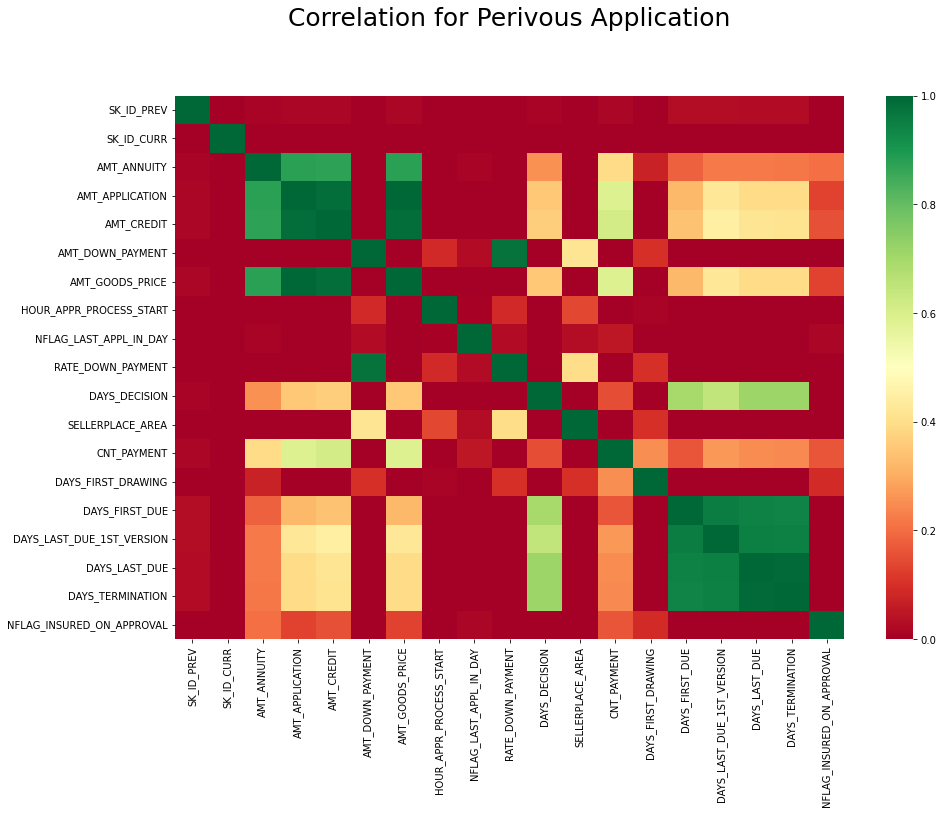

In [30]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
plt.title("Correlation for Perivous Application")
plt.yticks(rotation=0)
sns.heatmap(data  = pdf_corr, cmap="RdYlGn" ,annot=False, vmin=0, vmax=1)
plt.show()

Comment:

'DAYS_LAST_DUE' and 'DAYS_TERMINATION' are highly correlated
'DAYS_FIRST_DRAWING' and 'DAYS_LAST_DUE_1st_VERSION' have high negative correlation
'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' are highly correlated
The features can be removed before modelling this data, as they would cause collinearity 'DAYS_TERMINATION','DAYS_LAST_DUE_1st_VERSION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' For EDA purpose we are not removing them.

'SK_ID_PREV' column is not required for analysis.

In [31]:
pdf.drop(['SK_ID_PREV'], axis=1, inplace=True)

missing value in NAME_TYPE_SUITE

In [32]:
# Filling missing value with most common value

pdf['NAME_TYPE_SUITE'].fillna(pdf.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [33]:
pdf['NAME_TYPE_SUITE'].isna().sum()

0

In [34]:
# Merging required columns like 'SK_ID_CURR', 'TARGET' from application_data to previous_application_data

mergeddf = pd.merge(adf[['SK_ID_CURR', 'TARGET']], pdf, how='left', on=['SK_ID_CURR'])

mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111605 entries, 0 to 1111604
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1111605 non-null  int64  
 1   TARGET                       1111605 non-null  int64  
 2   NAME_CONTRACT_TYPE           1094176 non-null  object 
 3   AMT_ANNUITY                  1094176 non-null  float64
 4   AMT_APPLICATION              1094176 non-null  float64
 5   AMT_CREDIT                   1094176 non-null  float64
 6   AMT_DOWN_PAYMENT             1094176 non-null  float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1094176 non-null  object 
 9   HOUR_APPR_PROCESS_START      1094176 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1094176 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1094176 non-null  float64
 12  RATE_DOWN_PAYMENT            1094176 non-n

Data Imbalance

No. of non-defaulters:  1018825
No. of defaulters:  92780


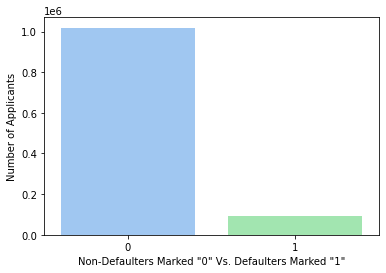

In [35]:
print("No. of non-defaulters: ", mergeddf[mergeddf["TARGET"] == 0].shape[0])
print("No. of defaulters: ", mergeddf[mergeddf["TARGET"] == 1].shape[0])

sns.countplot(mergeddf['TARGET']).set(ylabel = ("Number of Applicants"), xlabel = ('Non-Defaulters Marked "0" Vs. Defaulters Marked "1"'))

plt.show()

In [36]:
print("Percentage of defaulters: ", mergeddf[mergeddf["TARGET"] == 1].shape[0]*100/(mergeddf[mergeddf["TARGET"] == 1].shape[0]+mergeddf[mergeddf["TARGET"] == 0].shape[0]))
print("Percentage of Non - defaulters: ", mergeddf[mergeddf["TARGET"] == 0].shape[0]*100/(mergeddf[mergeddf["TARGET"] == 1].shape[0]+mergeddf[mergeddf["TARGET"] == 0].shape[0]))

Percentage of defaulters:  8.346489985201577
Percentage of Non - defaulters:  91.65351001479843


As we can see in above bar Plot Data is highly imbalance The Ratio between deflauters and Non-deflauters is nearly 8:92. Suggesting us to analysis it seperately

In [37]:
#Seprate Data to Defaulters and Non- Derfaulters
defaultor = mergeddf[mergeddf["TARGET"] == 1]
non_defaultor = mergeddf[mergeddf["TARGET"] == 0]

In [38]:
# check 'FLAG_LAST_APPL_PER_CONTRACT' and 'NFLAG_LAST_APPL_IN_DAY' imbalance in Previous Application Data
print(pdf.FLAG_LAST_APPL_PER_CONTRACT.value_counts())
print(pdf.NFLAG_LAST_APPL_IN_DAY.value_counts())

Y    1281237
N       3462
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1    1282054
0       2645
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


In [39]:
# check 'FLAG_LAST_APPL_PER_CONTRACT' and 'NFLAG_LAST_APPL_IN_DAY' imbalance in Merged Data
print(mergeddf.FLAG_LAST_APPL_PER_CONTRACT.value_counts())
print(mergeddf.NFLAG_LAST_APPL_IN_DAY.value_counts())

Y    1091289
N       2887
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1.0    1091980
0.0       2196
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


'FLAG_LAST_APPL_PER_CONTRACT' and 'NFLAG_LAST_APPL_IN_DAY' can be dropped for having highly imbalance data.

Univariate, Bivariate and Multivariate Analysis

Multivariate Analysis of Previous Application Data

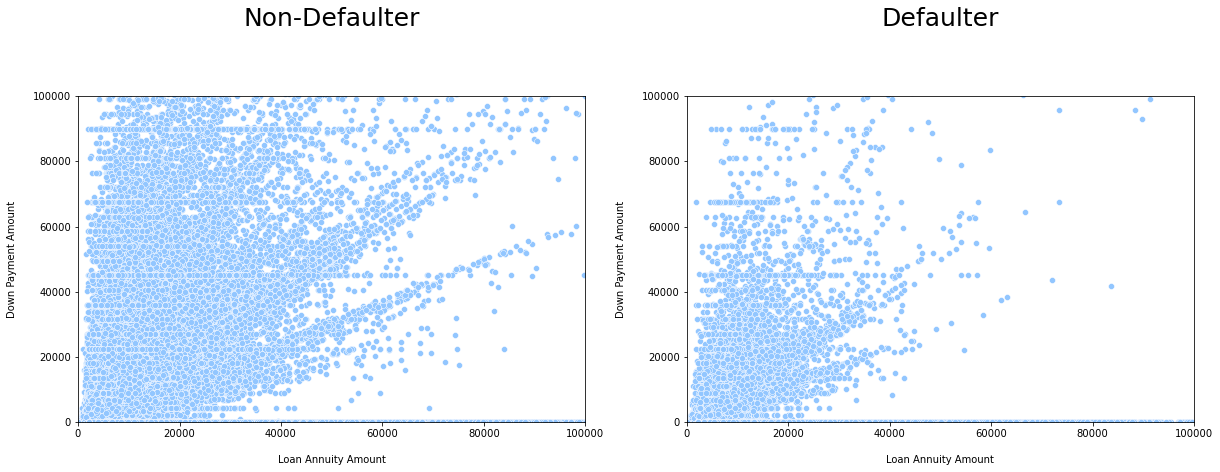

In [40]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,100000), xlim=(0,100000),title="Non-Defaulter")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,100000), xlim=(0,100000), title="Defaulter")

sns.scatterplot(mergeddf[mergeddf["TARGET"] == 0]['AMT_ANNUITY'], mergeddf[mergeddf["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1).set(ylabel="Down Payment Amount\n",
                                      xlabel = ('\nLoan Annuity Amount'))
sns.scatterplot(mergeddf[mergeddf["TARGET"] == 1]['AMT_ANNUITY'], mergeddf[mergeddf["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2).set(ylabel="Down Payment Amount\n",
                                      xlabel = ('\nLoan Annuity Amount'))

plt.show()

Number of defaulters are less as amount of annuity increase of previous application.
Also, for higher down payment, defaulter cases are less.

RATE_DOWN_PAYMENT

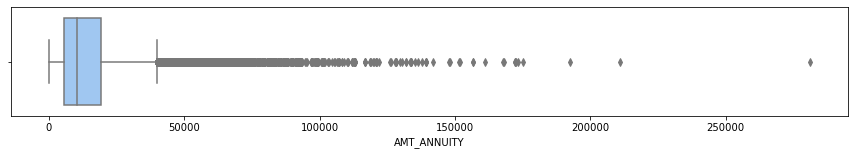

In [41]:
plt.figure(figsize=(15,2))
sns.boxplot(defaultor['AMT_ANNUITY'])
plt.show()

In [42]:
defaultor = defaultor[defaultor['AMT_ANNUITY'] < np.nanpercentile(defaultor['AMT_ANNUITY'], 98)]

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

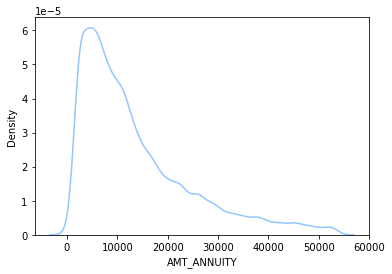

In [43]:
sns.kdeplot(defaultor['AMT_ANNUITY'])

For those who had lower rate of down payment in previous application, cases of default are higher.

Analysis of Categorical Features of Previous Application Data

NAME_CONTRACT_TYPE
Consumer loans     624068
Cash loans         393414
Revolving loans     76694
Name: TARGET, dtype: int64

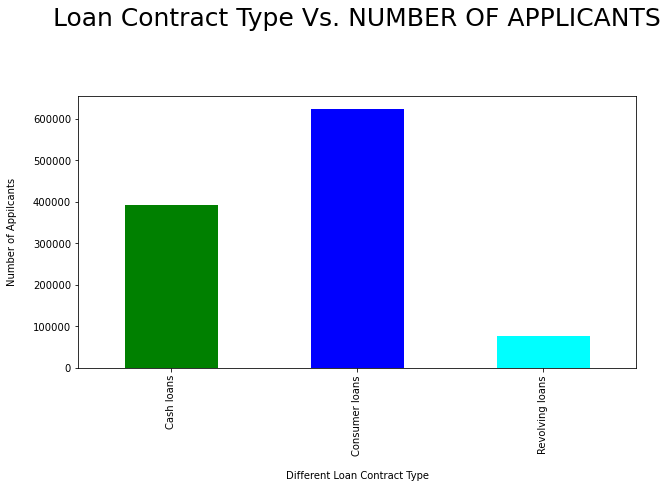

In [44]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_CONTRACT_TYPE")["TARGET"].count().plot.bar(color=[ 'green', 'blue', 'cyan'])
plt.title("Loan Contract Type Vs. NUMBER OF APPLICANTS")
plt.xlabel("\nDifferent Loan Contract Type")
plt.ylabel("Number of Appilcants\n")
mergeddf.groupby("NAME_CONTRACT_TYPE")["TARGET"].count().sort_values(ascending = False)

NAME_CONTRACT_TYPE
Revolving loans    0.113399
Cash loans         0.088970
Consumer loans     0.076988
Name: TARGET, dtype: float64

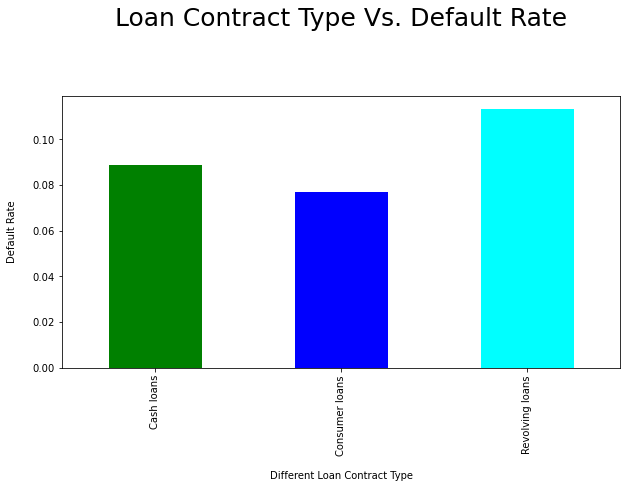

In [45]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar(color=['green', 'blue', 'cyan'])
plt.title("Loan Contract Type Vs. Default Rate")
plt.xlabel("\nDifferent Loan Contract Type")
plt.ylabel("Default Rate\n")
mergeddf.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().sort_values(ascending = False)

NAME_CONTRACT_STATUS
Approved        848577
Canceled          8964
Refused         213868
Unused offer     22767
Name: CODE_REJECT_REASON, dtype: int64

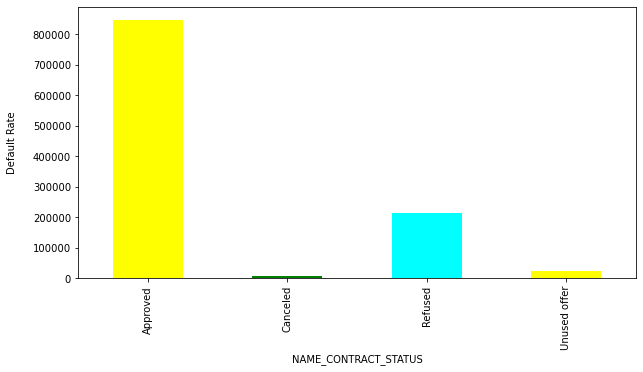

In [46]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_CONTRACT_STATUS")["CODE_REJECT_REASON"].count().plot.bar(color=['yellow', 'green', 'cyan'])
#plt.title("Application Start Day\n")
#plt.xlabel("")
plt.ylabel("Default Rate\n")
mergeddf.groupby("NAME_CONTRACT_STATUS")["CODE_REJECT_REASON"].count()

CODE_REJECT_REASON
HC        121708
LIMIT      46884
SCO        31869
SCOFR       7002
XNA         3390
VERIF       2939
SYSTEM        76
Name: TARGET, dtype: int64

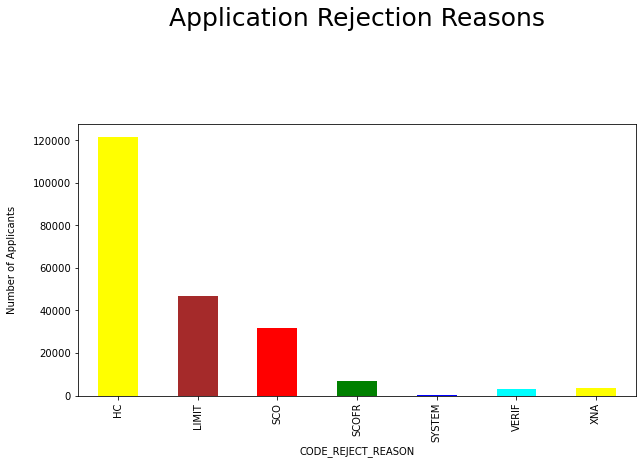

In [47]:
fig = plt.figure(figsize=(10,5))

mergeddf[mergeddf['NAME_CONTRACT_STATUS'] == "Refused"].groupby("CODE_REJECT_REASON")["TARGET"].count().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Application Rejection Reasons\n")
#plt.xlabel("")
plt.ylabel("Number of Applicants\n")
mergeddf[mergeddf['NAME_CONTRACT_STATUS'] == "Refused"].groupby("CODE_REJECT_REASON")["TARGET"].count().sort_values(ascending=False)

As seen in the above plot, 'SCO', 'LIMIT' and 'HC' are the most common reason of rejection.

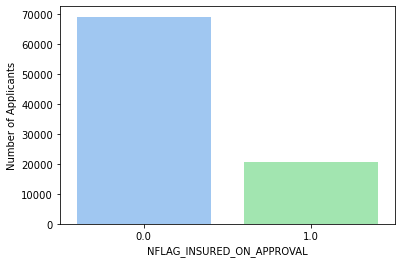

In [48]:
sns.countplot(defaultor['NFLAG_INSURED_ON_APPROVAL']).set(ylabel = ("Number of Applicants"))
plt.show()

Most of the people did not request insurance during previous loan application.

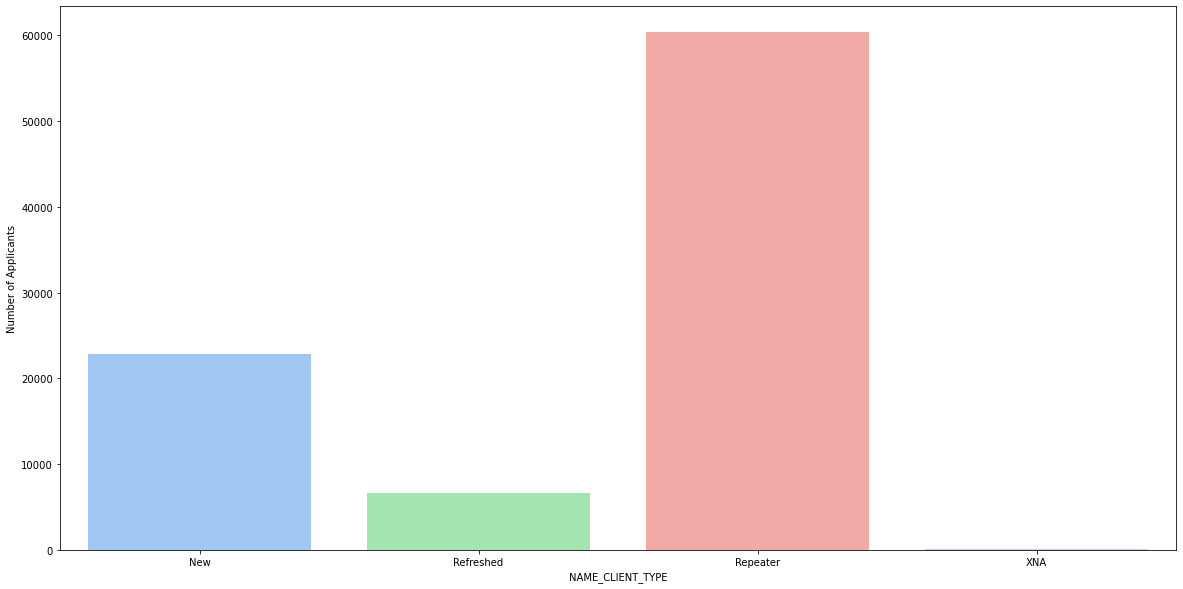

In [49]:
fig = plt.figure(figsize=(20,10))

sns.countplot(defaultor['NAME_CLIENT_TYPE']).set(ylabel = ("Number of Applicants"))
plt.show()

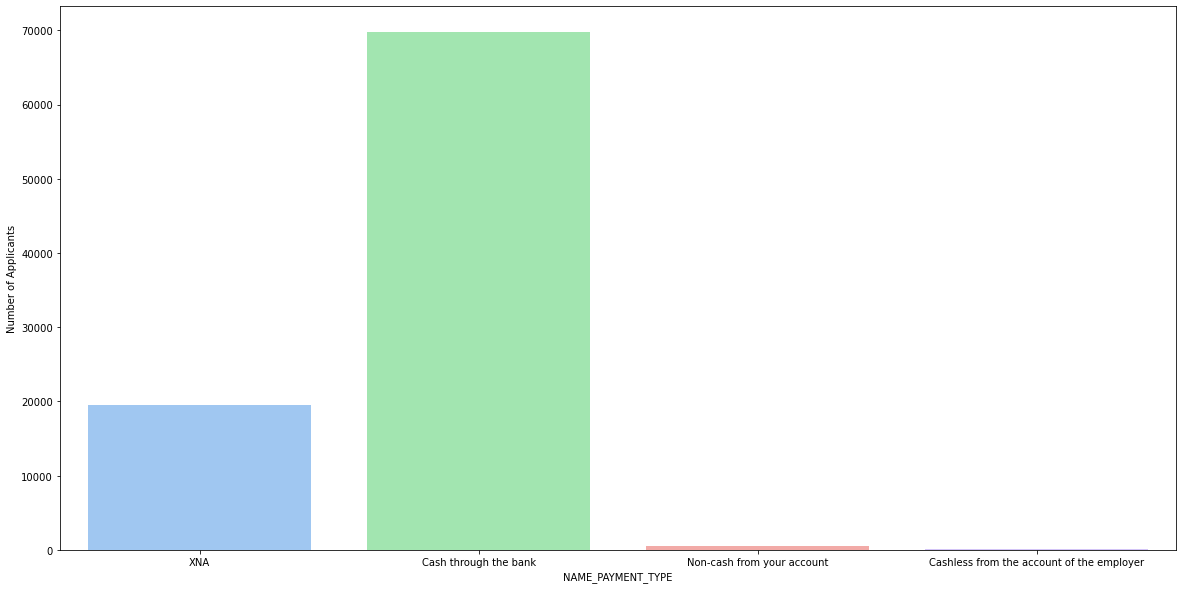

In [50]:
fig = plt.figure(figsize=(20,10))

sns.countplot(defaultor['NAME_PAYMENT_TYPE']).set(ylabel = ("Number of Applicants"))
plt.show()

NAME_GOODS_CATEGORY
Insurance                   0.103448
Vehicles                    0.100561
XNA                         0.092549
Auto Accessories            0.090719
Jewelry                     0.090401
Mobile                      0.086470
Office Appliances           0.082620
Direct Sales                0.081818
Computers                   0.081047
Weapon                      0.076923
Audio/Video                 0.076618
Photo / Cinema Equipment    0.076289
Sport and Leisure           0.072441
Consumer Electronics        0.070669
Construction Materials      0.069676
Gardening                   0.067183
Homewares                   0.066373
Additional Service          0.064220
Medicine                    0.061444
Furniture                   0.058496
Other                       0.057338
Clothing and Accessories    0.057019
Education                   0.056180
Medical Supplies            0.056173
Tourism                     0.042296
Fitness                     0.042169
Animals           

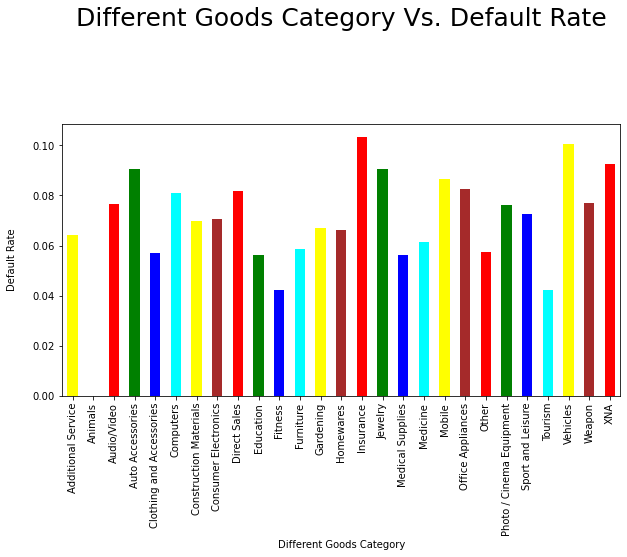

In [51]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_GOODS_CATEGORY")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Different Goods Category Vs. Default Rate\n")
plt.xlabel("Different Goods Category")
plt.ylabel("Default Rate\n")
mergeddf.groupby("NAME_GOODS_CATEGORY")["TARGET"].mean().sort_values(ascending=False)

NAME_PORTFOLIO
Cards    0.113405
XNA      0.091593
Cash     0.088765
POS      0.076360
Cars     0.055263
Name: TARGET, dtype: float64

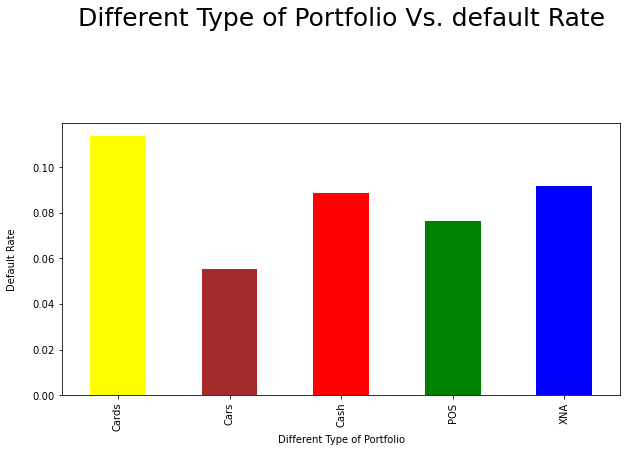

In [52]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_PORTFOLIO")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Different Type of Portfolio Vs. default Rate\n")
plt.xlabel("Different Type of Portfolio")
plt.ylabel("Default Rate\n")
mergeddf.groupby("NAME_PORTFOLIO")["TARGET"].mean().sort_values(ascending=False)

NAME_PRODUCT_TYPE
walk-in    0.124683
x-sell     0.080776
XNA        0.077150
Name: TARGET, dtype: float64

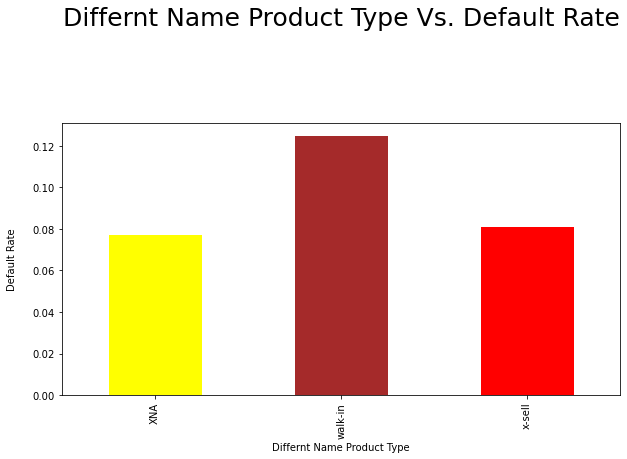

In [53]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_PRODUCT_TYPE")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Differnt Name Product Type Vs. Default Rate\n")
plt.xlabel("Differnt Name Product Type")
plt.ylabel("Default Rate\n")
mergeddf.groupby("NAME_PRODUCT_TYPE")["TARGET"].mean().sort_values(ascending=False)

CHANNEL_TYPE
AP+ (Cash loan)               0.129009
Contact center                0.100557
Credit and cash offices       0.086733
Country-wide                  0.082377
Regional / Local              0.075940
Stone                         0.073587
Channel of corporate sales    0.063248
Car dealer                    0.051724
Name: TARGET, dtype: float64

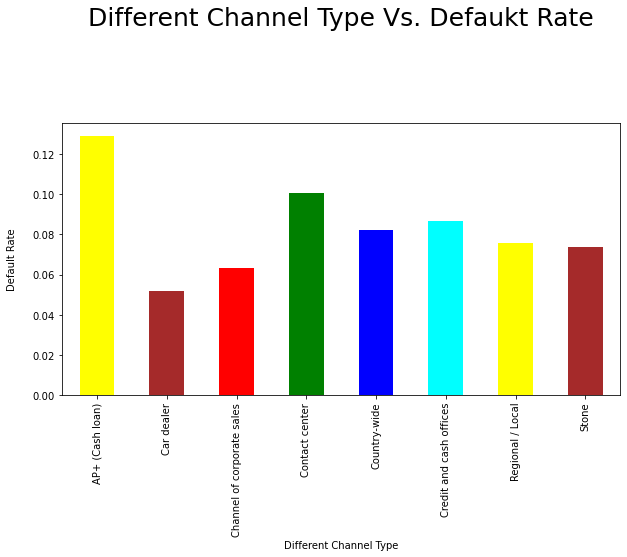

In [54]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("CHANNEL_TYPE")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Different Channel Type Vs. Defaukt Rate\n")
plt.xlabel("Different Channel Type")
plt.ylabel("Default Rate\n")
mergeddf.groupby("CHANNEL_TYPE")["TARGET"].mean().sort_values(ascending=False)

NAME_SELLER_INDUSTRY
Auto technology         0.103727
Connectivity            0.091811
XNA                     0.091601
Jewelry                 0.088319
Consumer electronics    0.075521
Industry                0.072267
Construction            0.065634
Furniture               0.060964
Clothing                0.057249
MLM partners            0.051813
Tourism                 0.042781
Name: TARGET, dtype: float64

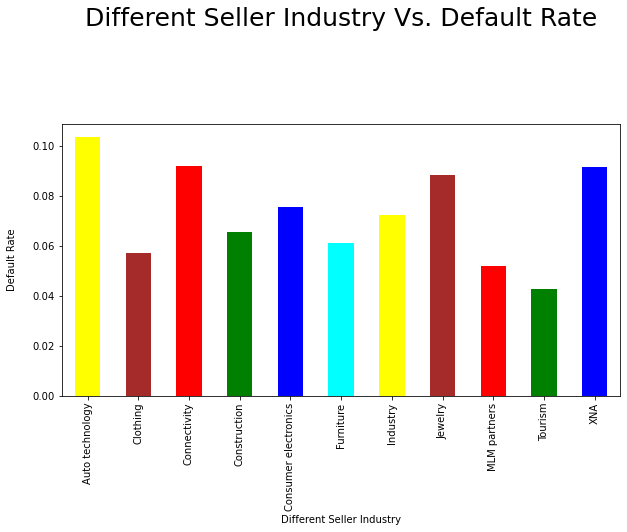

In [55]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_SELLER_INDUSTRY")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Different Seller Industry Vs. Default Rate\n")
plt.xlabel("Different Seller Industry")
plt.ylabel("Default Rate\n")
mergeddf.groupby("NAME_SELLER_INDUSTRY")["TARGET"].mean().sort_values(ascending=False)

NAME_YIELD_GROUP
XNA           0.106845
high          0.095452
middle        0.080432
low_normal    0.071321
low_action    0.064514
Name: TARGET, dtype: float64

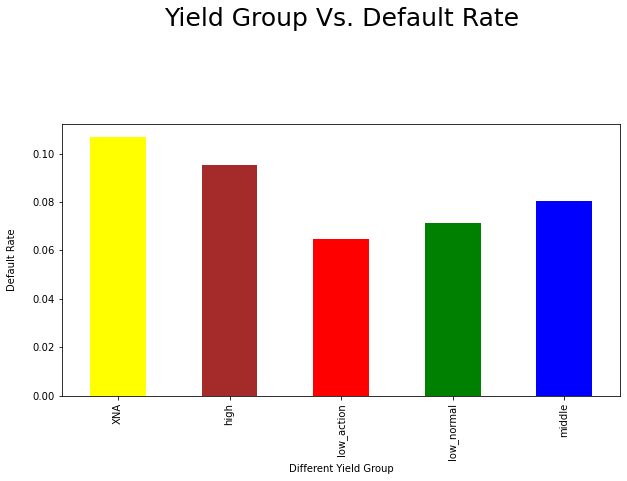

In [56]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("NAME_YIELD_GROUP")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Yield Group Vs. Default Rate\n")
plt.xlabel("Different Yield Group")
plt.ylabel("Default Rate\n")
mergeddf.groupby("NAME_YIELD_GROUP")["TARGET"].mean().sort_values(ascending=False)

PRODUCT_COMBINATION
Cash                              0.134780
Card Street                       0.124675
Cash Street: middle               0.116156
Cash X-Sell: high                 0.114936
Cash Street: high                 0.113639
Cash Street: low                  0.101004
Card X-Sell                       0.098668
POS mobile with interest          0.088001
POS other with interest           0.079288
POS mobile without interest       0.078834
Cash X-Sell: middle               0.078360
POS household with interest       0.077332
POS others without interest       0.072076
POS household without interest    0.066402
Cash X-Sell: low                  0.065832
POS industry with interest        0.063022
POS industry without interest     0.046417
Name: TARGET, dtype: float64

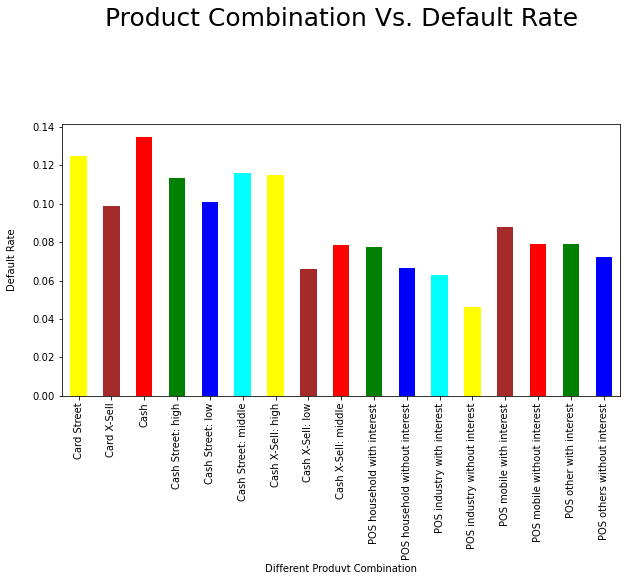

In [57]:
fig = plt.figure(figsize=(10,5))

mergeddf.groupby("PRODUCT_COMBINATION")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Product Combination Vs. Default Rate\n")
plt.xlabel("Different Produvt Combination")
plt.ylabel("Default Rate\n")
mergeddf.groupby("PRODUCT_COMBINATION")["TARGET"].mean().sort_values(ascending=False)

Highest default rate is in case of Cash.

### Conclusion:
#### For "Cards" defaulter percentage is highest (17%). 'NAME_PORTFOLIO' is an important feature for analyzing 'TARGET' variable. 15% loan applicatiant defaulted for AP+ (Cash Loan). 'CHANNEL_TYPE' is an important feature for analyzing 'TARGET' variable. Highest percentage (17%) of default cases is for 'Card Street'. 'PRODUCT_COMBINATION' is an important driving factor.